## Importações e carregamento da base de dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, KFold

In [4]:
import pickle
with open('./content/credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [5]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [6]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [7]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis=0)
x_credit.shape

(2000, 3)

In [8]:
x_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [9]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)
y_credit.shape

(2000,)

In [10]:
y_credit

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## Validação Cruzada / Cross Validation

### Árvore de Decisão

In [11]:
resultados_arvore = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_arvore.append(scores.mean())

In [12]:
resultados_arvore

[0.986,
 0.9854999999999998,
 0.9905000000000002,
 0.9875,
 0.9884999999999999,
 0.9884999999999999,
 0.9880000000000001,
 0.9875,
 0.9865,
 0.9869999999999999,
 0.9860000000000001,
 0.9894999999999999,
 0.9889999999999999,
 0.9869999999999999,
 0.9835,
 0.9864999999999998,
 0.9855,
 0.9904999999999999,
 0.9875,
 0.9869999999999999,
 0.983,
 0.9865,
 0.9889999999999999,
 0.9875,
 0.9870000000000001,
 0.9880000000000001,
 0.9875,
 0.9855,
 0.986,
 0.9880000000000001]

### Random Forest

In [13]:
resultados_random_forest = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_random_forest.append(scores.mean())

In [14]:
resultados_random_forest

[0.9844999999999999,
 0.9835,
 0.983,
 0.9824999999999999,
 0.9864999999999998,
 0.9825000000000002,
 0.9844999999999999,
 0.9869999999999999,
 0.9870000000000001,
 0.9845,
 0.9824999999999999,
 0.9845,
 0.9835,
 0.9834999999999999,
 0.9824999999999999,
 0.9865,
 0.985,
 0.985,
 0.9849999999999998,
 0.9845,
 0.985,
 0.9834999999999999,
 0.984,
 0.9849999999999998,
 0.984,
 0.9829999999999999,
 0.985,
 0.9844999999999999,
 0.9834999999999999,
 0.983]

### kNN

In [15]:
resultados_knn = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_knn.append(scores.mean())

In [16]:
resultados_knn

[0.9814999999999999,
 0.9799999999999999,
 0.9794999999999998,
 0.978,
 0.9819999999999999,
 0.978,
 0.9804999999999999,
 0.9799999999999999,
 0.9795,
 0.9819999999999999,
 0.9794999999999998,
 0.9825000000000002,
 0.9825000000000002,
 0.978,
 0.9810000000000001,
 0.9789999999999999,
 0.9809999999999999,
 0.9800000000000001,
 0.9804999999999999,
 0.9795,
 0.9819999999999999,
 0.9824999999999999,
 0.978,
 0.9809999999999999,
 0.9795,
 0.9790000000000001,
 0.977,
 0.9785,
 0.9789999999999999,
 0.9804999999999999]

### Logistic Regression / Regressão Logística

In [17]:
resultados_logistic_regression = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    logistic_regression = LogisticRegression(C = 1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistic_regression, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_logistic_regression.append(scores.mean())

In [18]:
resultados_logistic_regression

[0.9475,
 0.9465,
 0.9470000000000001,
 0.946,
 0.9465,
 0.9465,
 0.9469999999999998,
 0.9480000000000001,
 0.9465,
 0.9465,
 0.9475,
 0.9479999999999998,
 0.9475,
 0.9484999999999999,
 0.9484999999999999,
 0.9475,
 0.946,
 0.9470000000000001,
 0.9465,
 0.9464999999999998,
 0.9465,
 0.9469999999999998,
 0.9455,
 0.9465,
 0.9475000000000001,
 0.9469999999999998,
 0.9475,
 0.9465,
 0.9480000000000001,
 0.9465]

### SVM (Support Vector Machine)

In [68]:
resultados_svm = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    svm = SVC(kernel='rbf', C=2.0, probability=True)
    scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_svm.append(scores.mean())

In [69]:
resultados_svm

[0.9845,
 0.984,
 0.9864999999999998,
 0.985,
 0.985,
 0.9845,
 0.986,
 0.9849999999999998,
 0.984,
 0.9845,
 0.984,
 0.9845,
 0.9855,
 0.9855,
 0.983,
 0.9865,
 0.986,
 0.9865,
 0.985,
 0.9844999999999999,
 0.984,
 0.985,
 0.9865,
 0.9875,
 0.9869999999999999,
 0.982,
 0.984,
 0.9865,
 0.9834999999999999,
 0.9865]

### Neural Network / Redes Neurais

In [ ]:
resultados_neural = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    neural = MLPClassifier(activation='relu',  batch_size=56, solver='adam')
    scores = cross_val_score(neural, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_neural.append(scores.mean())

In [22]:
resultados_neural

[0.9970000000000001,
 0.9974999999999999,
 0.9969999999999999,
 0.9964999999999999,
 0.9964999999999999,
 0.9970000000000001,
 0.9964999999999999,
 0.9970000000000001,
 0.9964999999999998,
 0.9975000000000002,
 0.9964999999999999,
 0.9964999999999999,
 0.9969999999999999,
 0.9974999999999999,
 0.9964999999999999,
 0.998,
 0.9970000000000001,
 0.9970000000000001,
 0.998,
 0.9969999999999999,
 0.9964999999999999,
 0.9964999999999998,
 0.9970000000000001,
 0.9974999999999999,
 0.9974999999999999,
 0.9969999999999999,
 0.9970000000000001,
 0.9970000000000001,
 0.9970000000000001,
 0.9955]

## Análise dos resultados

In [23]:
resultados = pd.DataFrame({
    'Arvore': resultados_arvore, 
    'Random Forest': resultados_random_forest, 
    'KNN': resultados_knn, 
    'Regressão Logística': resultados_logistic_regression, 
    'SVM': resultados_svm, 
    'Rede Neural': resultados_neural
    })
resultados

,Arvore,Random Forest,KNN,Regressão Logística,SVM,Rede Neural
0,0.9860,0.9845,0.9815,0.9475,0.9845,0.9970
1,0.9855,0.9835,0.9800,0.9465,0.9840,0.9975
2,0.9905,0.9830,0.9795,0.9470,0.9865,0.9970
3,0.9875,0.9825,0.9780,0.9460,0.9850,0.9965
4,0.9885,0.9865,0.9820,0.9465,0.9850,0.9965
5,0.9885,0.9825,0.9780,0.9465,0.9845,0.9970
6,0.9880,0.9845,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9870,0.9800,0.9480,0.9850,0.9970
8,0.9865,0.9870,0.9795,0.9465,0.9840,0.9965
9,0.9870,0.9845,0.9820,0.9465,0.9845,0.9975


In [24]:
resultados.describe()

,Arvore,Random Forest,KNN,Regressão Logística,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987183,0.984283,0.980050,0.947000,0.985083,0.996950
std,0.001714,0.001298,0.001533,0.000743,0.001280,0.000514
min,0.983000,0.982500,0.977000,0.945500,0.982000,0.995500
25%,0.986125,0.983500,0.979000,0.946500,0.984125,0.996500
50%,0.987250,0.984500,0.980000,0.947000,0.985000,0.997000
75%,0.988000,0.985000,0.981000,0.947500,0.986375,0.997000
max,0.990500,0.987000,0.982500,0.948500,0.987500,0.998000


In [25]:
# Coeficiente de variação
(resultados.std() / resultados.mean()) * 100

Arvore                 0.173672
Random Forest          0.131849
KNN                    0.156446
Regressão Logística    0.078435
SVM                    0.129977
Rede Neural            0.051602
dtype: float64

### Testes Estatísticos - teste de normalidade nos resultados (Shapiro)

In [26]:
from scipy.stats import shapiro

In [27]:
# Se o valor de p for menor que alpha, a distribuição não é normal (indica que aceitamos a hipótese nula - H0)
alpha = 0.05

shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistic_regression), shapiro(resultados_svm), shapiro(resultados_neural)

(ShapiroResult(statistic=0.9672829887415539, pvalue=0.46775650614854686),
 ShapiroResult(statistic=0.9227115496275244, pvalue=0.031554725442551126),
 ShapiroResult(statistic=0.9584024823930501, pvalue=0.2818135378764127),
 ShapiroResult(statistic=0.9309147727892649, pvalue=0.051930740130906254),
 ShapiroResult(statistic=0.9622985607506823, pvalue=0.3541579284945434),
 ShapiroResult(statistic=0.8891024231570388, pvalue=0.004593799053237667))

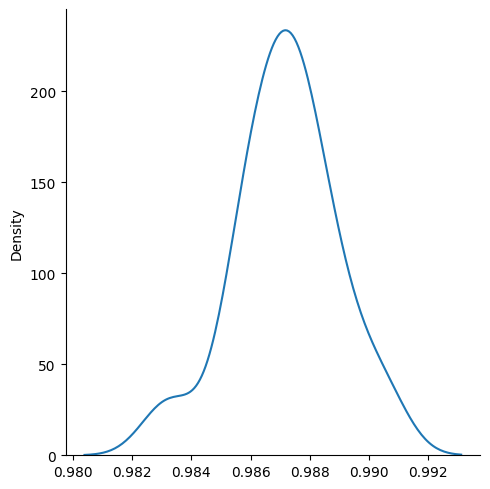

In [28]:
sns.displot(resultados_arvore, kind='kde')

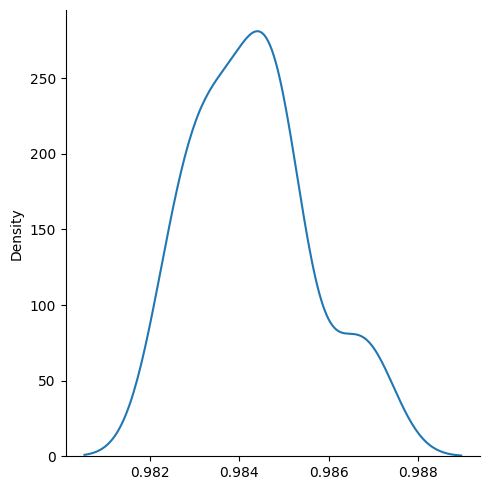

In [29]:
sns.displot(resultados_random_forest, kind='kde')

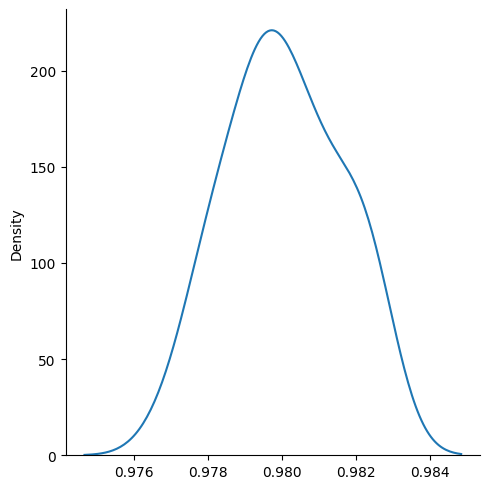

In [30]:
sns.displot(resultados_knn, kind='kde')

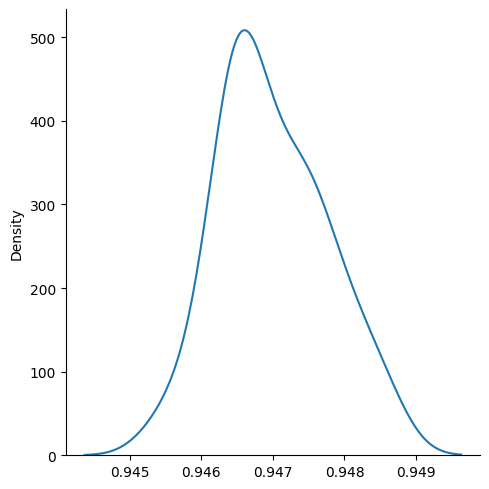

In [31]:
sns.displot(resultados_logistic_regression, kind='kde')

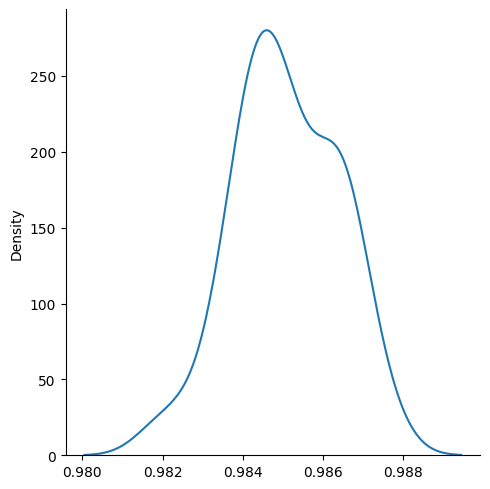

In [32]:
sns.displot(resultados_svm, kind='kde')

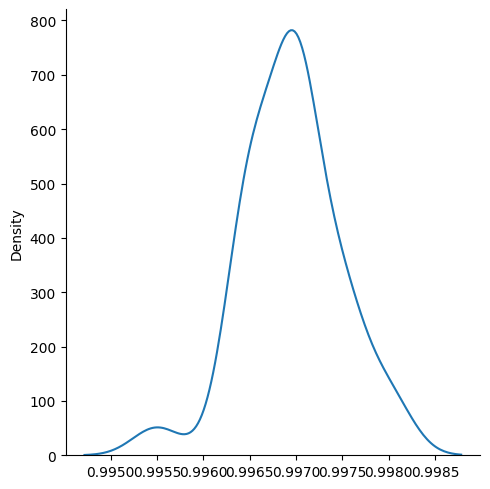

In [33]:
sns.displot(resultados_neural, kind='kde')

### Análise de variação - ANOVA e Tukey

In [34]:
from scipy.stats import f_oneway

In [35]:
alpha = 0.05

_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistic_regression, resultados_svm, resultados_neural)
p

2.8243707316759796e-190

In [36]:
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes.')
else:
    print('Hipótese alternativa rejeitada. Dados são iguais.')

Hipótese nula rejeitada. Dados são diferentes.


In [37]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistic_regression, resultados_svm, resultados_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [38]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9855,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9885,arvore
...,...,...
175,0.9970,rede_neural
176,0.9970,rede_neural
177,0.9970,rede_neural
178,0.9970,rede_neural


In [39]:
from statsmodels.stats.multicomp import MultiComparison

In [40]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [41]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071    0.0 -0.0081 -0.0062   True
       arvore     logistica  -0.0402    0.0 -0.0411 -0.0393   True
       arvore random_forest  -0.0029    0.0 -0.0038  -0.002   True
       arvore   rede_neural   0.0098    0.0  0.0088  0.0107   True
       arvore           svm  -0.0021    0.0  -0.003 -0.0012   True
          knn     logistica   -0.033    0.0  -0.034 -0.0321   True
          knn random_forest   0.0042    0.0  0.0033  0.0052   True
          knn   rede_neural   0.0169    0.0   0.016  0.0178   True
          knn           svm    0.005    0.0  0.0041   0.006   True
    logistica random_forest   0.0373    0.0  0.0364  0.0382   True
    logistica   rede_neural   0.0499    0.0   0.049  0.0509   True
    logistica           svm   0.0381    0.0  0.0372   0.039   

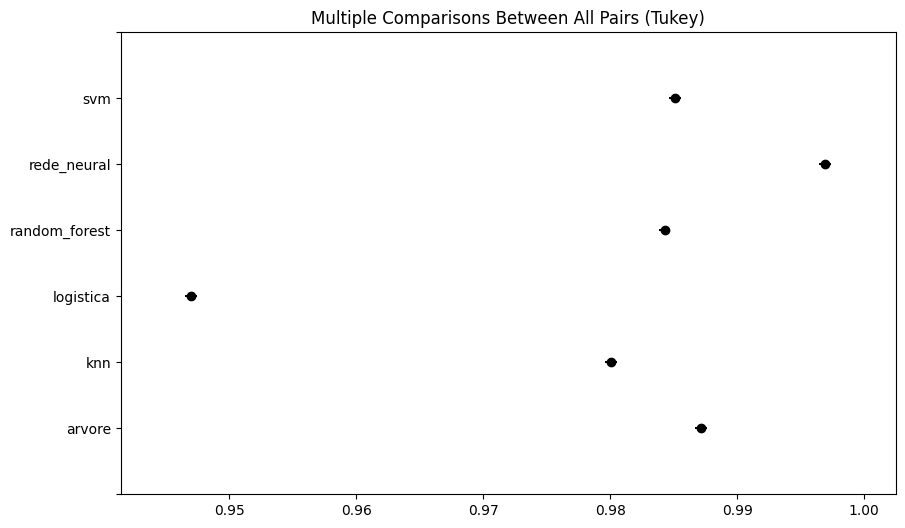

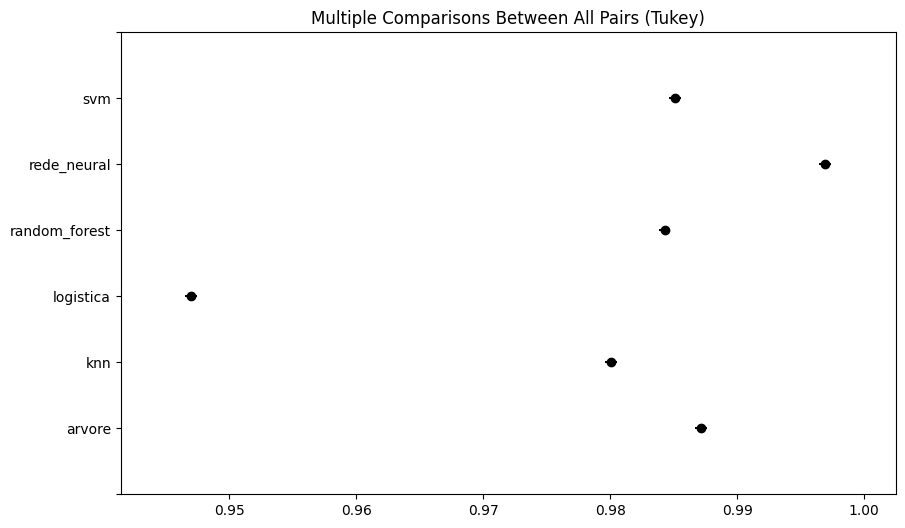

In [42]:
teste_estatistico.plot_simultaneous()

## Salvando classificadores treinados

In [44]:
neural.fit(x_credit, y_credit)

c:\Users\rafael.soares\Documents\Curso-Data-Science\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [45]:
arvore.fit(x_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [70]:
svm.fit(x_credit, y_credit)

SVC(C=2.0, probability=True)

In [71]:
import pickle
pickle.dump(neural, open('./content/rede_neural_credit.sav', 'wb'))
pickle.dump(arvore, open('./content/arvore_credit.sav', 'wb'))
pickle.dump(svm, open('./content/svm_credit.sav', 'wb'))

## Carregando classificadores treinados

In [72]:
neural = pickle.load(open('./content/rede_neural_credit.sav', 'rb'))
arvore = pickle.load(open('./content/arvore_credit.sav', 'rb'))
svm = pickle.load(open('./content/svm_credit.sav', 'rb'))

In [89]:
novo_registro = x_credit[0]
novo_registro = novo_registro.reshape(1, -1)

In [90]:
neural.predict(novo_registro)

array([0], dtype=int64)

In [91]:
arvore.predict(novo_registro)

array([0], dtype=int64)

In [92]:
svm.predict(novo_registro)

array([0], dtype=int64)

## Combinação de classificadores

In [93]:
resosta_neural = neural.predict(novo_registro)
resosta_arvore = arvore.predict(novo_registro)
resosta_svm = svm.predict(novo_registro)

In [94]:
paga = 0
nao_paga = 0

if resosta_neural[0] == 1:
    nao_paga += 1
else:
    paga += 1

if resosta_arvore[0] == 1:
    nao_paga += 1
else:
    paga += 1

if resosta_svm[0] == 1:
    nao_paga += 1
else:
    paga += 1

if paga > nao_paga:
    print('Cliente pagará o empréstimo')
elif paga == nao_paga:
    print('Empate')
else:
    print('Cliente não pagará o empréstimo')

Cliente pagará o empréstimo


## Rejeição de classificadores

In [95]:
probabilidade_neural = neural.predict_proba(novo_registro)
probabilidade_arvore = arvore.predict_proba(novo_registro)
probabilidade_svm = svm.predict_proba(novo_registro)

confianca_neural = probabilidade_neural.max()
confianca_arvore = probabilidade_arvore.max()
confianca_svm = probabilidade_svm.max()

probabilidade_neural, confianca_neural, probabilidade_arvore, confianca_arvore, probabilidade_svm, confianca_svm

(array([[1.00000000e+00, 1.28833323e-16]]),
 0.9999999999999999,
 array([[1., 0.]]),
 1.0,
 array([[9.99997618e-01, 2.38223780e-06]]),
 0.9999976177621964)

In [96]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos = 0
if confianca_neural >= confianca_minima:
    algoritmos += 1
    if resosta_neural[0] == 1:
        nao_paga += 1
    else:
        paga += 1

if confianca_arvore >= confianca_minima:
    algoritmos += 1
    if resosta_arvore[0] == 1:
        nao_paga += 1
    else:
        paga += 1

if confianca_svm >= confianca_minima:
    algoritmos += 1
    if resosta_svm[0] == 1:
        nao_paga += 1
    else:
        paga += 1

if paga > nao_paga:
    print('Cliente pagará o empréstimo, baseado em {} algoritmos'. format(algoritmos))
elif paga == nao_paga:
    print('Empate')
else:
    print('Cliente não pagará o empréstimo, baseado em {} algoritmos'. format(algoritmos))

Cliente pagará o empréstimo, baseado em 2 algoritmos
